# Data Analysis for Conventional vs Organic Vegetables and Fruits

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [32]:

# File to Load (Remember to Change These)
file_to_load = "USDAPricesJan2019.xls"

# Read Purchasing File and store into Pandas data frame
price_df = pd.read_excel(file_to_load)
price_df.head()

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,2019-01-04,NATIONAL,FRUITS,APPLE PEARS,NaN,NaN,NaN,each,19,3.00,NaN,NaN,NaN
1,2019-01-04,NATIONAL,FRUITS,APPLE PEARS,NaN,NaN,NaN,per pound,7,1.76,NaN,NaN,NaN
2,2019-01-04,NATIONAL,FRUITS,APPLES,BRAEBURN,NaN,NaN,5 lb bag,20,4.99,NaN,NaN,NaN
3,2019-01-04,NATIONAL,FRUITS,APPLES,BRAEBURN,NaN,NaN,per pound,159,1.05,NaN,NaN,NaN
4,2019-01-04,NATIONAL,FRUITS,APPLES,BRAEBURN,Y,NaN,3 lb bag,230,3.98,NaN,NaN,NaN


In [33]:

price_df = price_df[ price_df.Region == "NATIONAL"]
price_df = price_df[ price_df.Unit == "per pound"]
price_df['Commodity-Variety'] = price_df['Commodity'] + '-' + price_df['Variety']


In [34]:
vegs = ['SQUASH-ACORN', 'POTATOES-RUSSET','PEPPERS, BELL TYPE-GREEN', 'ONIONS DRY-YELLOW'
        , 'CABBAGE-ROUND GREEN TYPE']
vegs_plot_df = price_df.loc[price_df['Commodity-Variety'].isin(vegs)]

vegs_plot_df = vegs_plot_df.sort_values(['Commodity'], ascending=False)
vegs_plot_df

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local,Commodity-Variety
315,2019-01-04,NATIONAL,VEGETABLES,SQUASH,ACORN,NaN,NaN,per pound,596,0.97,NaN,NaN,NaN,SQUASH-ACORN
316,2019-01-04,NATIONAL,VEGETABLES,SQUASH,ACORN,Y,NaN,per pound,524,1.06,NaN,NaN,NaN,SQUASH-ACORN
188,2019-01-04,NATIONAL,ONIONS AND POTATOES,POTATOES,RUSSET,NaN,NaN,per pound,2832,0.77,NaN,NaN,NaN,POTATOES-RUSSET
191,2019-01-04,NATIONAL,ONIONS AND POTATOES,POTATOES,RUSSET,Y,NaN,per pound,149,0.99,NaN,NaN,NaN,POTATOES-RUSSET
281,2019-01-04,NATIONAL,VEGETABLES,"PEPPERS, BELL TYPE",GREEN,NaN,NaN,per pound,489,1.60,NaN,NaN,NaN,"PEPPERS, BELL TYPE-GREEN"
283,2019-01-04,NATIONAL,VEGETABLES,"PEPPERS, BELL TYPE",GREEN,Y,NaN,per pound,19,1.69,NaN,NaN,NaN,"PEPPERS, BELL TYPE-GREEN"
166,2019-01-04,NATIONAL,ONIONS AND POTATOES,ONIONS DRY,YELLOW,NaN,NaN,per pound,1161,0.73,NaN,NaN,NaN,ONIONS DRY-YELLOW
169,2019-01-04,NATIONAL,ONIONS AND POTATOES,ONIONS DRY,YELLOW,Y,NaN,per pound,219,1.47,NaN,NaN,NaN,ONIONS DRY-YELLOW
213,2019-01-04,NATIONAL,VEGETABLES,CABBAGE,ROUND GREEN TYPE,NaN,NaN,per pound,2924,0.59,NaN,NaN,NaN,CABBAGE-ROUND GREEN TYPE
214,2019-01-04,NATIONAL,VEGETABLES,CABBAGE,ROUND GREEN TYPE,Y,NaN,per pound,16,1.69,NaN,NaN,NaN,CABBAGE-ROUND GREEN TYPE


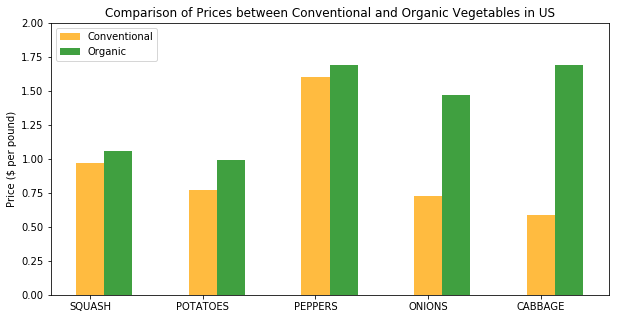

In [52]:
organic_prices = vegs_plot_df[ vegs_plot_df.Organic == "Y"]['Weighted Avg Price']
conv_prices = vegs_plot_df[ vegs_plot_df.Organic != "Y"]['Weighted Avg Price']

position = list(range(len(vegs))) 
width = 0.25 


# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(position, conv_prices, width, alpha=0.75, facecolor='orange', label="Regular" )
plt.bar([p + width for p in position], organic_prices, width, alpha=0.75, facecolor='green', label="Regular" )


vegs_display = ['', 'SQUASH', 'POTATOES','PEPPERS', 'ONIONS', 'CABBAGE']
ax.set_xticklabels(vegs_display)

plt.legend (['Conventional', 'Organic'], loc = 'upper left')
ax.set_title ('Comparison of Prices between Conventional and Organic Vegetables in US')
ax.set_ylabel('Price ($ per pound)')
plt.ylim(0, 2)
plt.show()

In [36]:
fruits = ['APPLES-RED DELICIOUS','CHERRIES-RED VARIETIES', 'GRAPES-RED SEEDLESS'
        , 'ORANGES-NAVEL']
fruits_plot_df = price_df.loc[price_df['Commodity-Variety'].isin(fruits)]

fruits_plot_df = fruits_plot_df.sort_values(['Commodity'], ascending=False)
fruits_plot_df

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local,Commodity-Variety
115,2019-01-04,NATIONAL,FRUITS,ORANGES,NAVEL,NaN,NaN,per pound,4016,0.99,NaN,NaN,NaN,ORANGES-NAVEL
118,2019-01-04,NATIONAL,FRUITS,ORANGES,NAVEL,Y,NaN,per pound,490,1.80,NaN,NaN,NaN,ORANGES-NAVEL
88,2019-01-04,NATIONAL,FRUITS,GRAPES,RED SEEDLESS,NaN,NaN,per pound,6949,2.09,NaN,NaN,NaN,GRAPES-RED SEEDLESS
89,2019-01-04,NATIONAL,FRUITS,GRAPES,RED SEEDLESS,Y,NaN,per pound,14,2.17,NaN,NaN,NaN,GRAPES-RED SEEDLESS
76,2019-01-04,NATIONAL,FRUITS,CHERRIES,RED VARIETIES,NaN,NaN,per pound,6306,4.88,NaN,NaN,NaN,CHERRIES-RED VARIETIES
77,2019-01-04,NATIONAL,FRUITS,CHERRIES,RED VARIETIES,Y,NaN,per pound,37,5.99,NaN,NaN,NaN,CHERRIES-RED VARIETIES
47,2019-01-04,NATIONAL,FRUITS,APPLES,RED DELICIOUS,NaN,NaN,per pound,1196,1.10,NaN,NaN,NaN,APPLES-RED DELICIOUS
49,2019-01-04,NATIONAL,FRUITS,APPLES,RED DELICIOUS,Y,NaN,per pound,335,1.99,NaN,NaN,NaN,APPLES-RED DELICIOUS


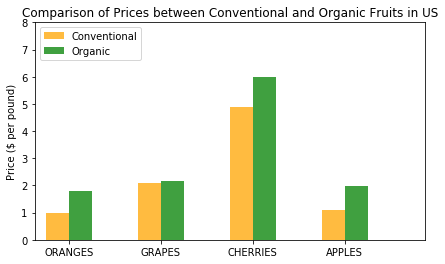

[0, 1, 2, 3]

In [55]:
organic_prices = fruits_plot_df[ fruits_plot_df.Organic == "Y"]['Weighted Avg Price']
conv_prices = fruits_plot_df[ fruits_plot_df.Organic != "Y"]['Weighted Avg Price']

position = list(range(len(fruits))) 
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(7,4))

# Create a bar with pre_score data,
# in position pos,
plt.bar(position, conv_prices, width, alpha=0.75, facecolor='orange', label="Regular" )
plt.bar([q + width for q in position], organic_prices, width, alpha=0.75, facecolor='green', label="Regular" )

fruits_display = ['ORANGES', 'GRAPES','CHERRIES', 'APPLES']

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in position])

# Set the labels for the x ticks
ax.set_xticklabels(fruits_display)


# Setting the x-axis and y-axis limits
plt.xlim(min(position)-width, max(position)+width*4)
#plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )
plt.ylim(0, 8)
plt.legend (['Conventional', 'Organic'], loc = 'upper left')
ax.set_title ('Comparison of Prices between Conventional and Organic Fruits in US')
ax.set_ylabel('Price ($ per pound)')
plt.show()
position